Mariana Sofía Flores Jiménez
A01228124

# IA5008: Sistemas neuronales
## Assignment 5
Professor: Dr. Leonardo Chang Fernández    

# Classification with CNNs on CIFAR10

## Instructions

Let's face a more serious classification problem. Called CIFAR10, this dataset is used as a benchmark, demonstrating how a new model outperforms its predecessors and establish itself as the state of the art of classification models.

We will see how even with a deeper and more powerful network the result is much lower than in the MNIST dataset, since the problem is more difficult. The CIFAR10 dataset consists of 50,000 RGB images of 32 x 32 pixels, divided into 10 categories.

- Adjust the following hyperparameters:
    - Number and type of layers
    - Number of filters
    - Filter size
    - Dropout
    - etc.
- Discuss the effect of these hyperparameters in the performance of classification.


In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [20]:
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

('x_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


# Test 1: Simple LeNet5 

* 4 convolutinal layers 
* 2 maxpooling layers 
* No dropout layers 






In [54]:
#
# Put your model definition HERE
#
from keras import models
from keras import layers

#First, the implementation of the model explained in class
def lenet5_simple():
    model=Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding='valid', activation='relu', input_shape=(32,32,3)))
    model.add(layers.Conv2D(filters=1, kernel_size=(2, 2), strides=2, padding='valid', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'))
    model.add(layers.Conv2D(filters=1, kernel_size=(2,2), strides=2, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(80, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [63]:
# initiate RMSprop optimizer
model=lenet5_simple()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 16s 327us/step - loss: 2.2608 - accuracy: 0.1287 - val_loss: 2.2027 - val_accuracy: 0.1517
Epoch 2/6
50000/50000 [==============================] - 16s 326us/step - loss: 2.1603 - accuracy: 0.1578 - val_loss: 2.0974 - val_accuracy: 0.1683
Epoch 3/6
50000/50000 [==============================] - 17s 333us/step - loss: 2.0468 - accuracy: 0.1836 - val_loss: 2.0132 - val_accuracy: 0.1989
Epoch 4/6
50000/50000 [==============================] - 17s 332us/step - loss: 2.0054 - accuracy: 0.1979 - val_loss: 1.9910 - val_accuracy: 0.1978
Epoch 5/6
50000/50000 [==============================] - 17s 342us/step - loss: 1.9887 - accuracy: 0.2019 - val_loss: 1.9744 - val_accuracy: 0.2029
Epoch 6/6
10000/10000 [==============================] - 1s 87us/step
('Test loss:', 1.9666173397064208)
('Test accuracy:', 0.21230000257492065)


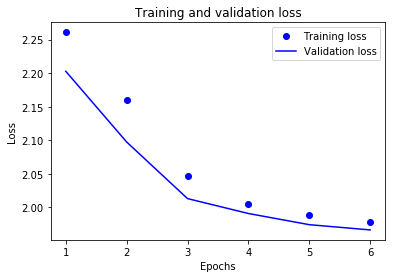

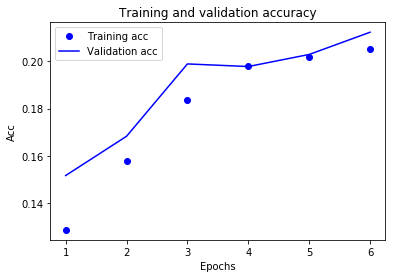

In [64]:
model.fit(x_train, y_train,
    batch_size=32,
    epochs=6,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()




**Discussion**


* For this model, the number of filters was relatively small; 6, 1, 16 and 1. 
* The padding was only selecting for the last convolutional layer.
* The kernel size varied; 5, 2, 5, 2.
* Two Max pooling layers were implemented, with a stride of 2.
* Finally, 3 dense (fully connected) layers were used, with 400, 120 and 80, plus the final one fot the computing of the ten probabilities. 

As a result from this model, we have that the validation accuracy is bigger than the training one, which indicates that the model is not overfitting, however, the validation accuracy (0.2123) is much smaller than the validation loss (1.9666), which indicates that the model has a lot of misclassifications. 




# Test 2- LeNet5 with Dropout 


In [65]:
#Second model adding dropout
def lenet5_drop():
    model=Sequential()
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding='valid', activation='relu', input_shape=(32,32,3)))
    model.add(Dropout(0.5))
    model.add(layers.Conv2D(filters=1, kernel_size=(2, 2), strides=2, padding='valid', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(Dropout(0.5))
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'))
    model.add(layers.Conv2D(filters=1, kernel_size=(2,2), strides=2, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(80, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model





Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 18s 359us/step - loss: 2.2809 - accuracy: 0.1175 - val_loss: 2.2846 - val_accuracy: 0.1279
Epoch 2/6
50000/50000 [==============================] - 18s 357us/step - loss: 2.2391 - accuracy: 0.1448 - val_loss: 2.3156 - val_accuracy: 0.1106
Epoch 3/6
50000/50000 [==============================] - 18s 367us/step - loss: 2.2201 - accuracy: 0.1478 - val_loss: 2.3860 - val_accuracy: 0.1058
Epoch 4/6
50000/50000 [==============================] - 19s 371us/step - loss: 2.2003 - accuracy: 0.1469 - val_loss: 2.4076 - val_accuracy: 0.1075
Epoch 5/6
50000/50000 [==============================] - 18s 366us/step - loss: 2.1885 - accuracy: 0.1490 - val_loss: 2.4640 - val_accuracy: 0.1081
Epoch 6/6
10000/10000 [==============================] - 1s 90us/step
('Test loss:', 2.463426818084717)
('Test accuracy:', 0.10859999805688858)


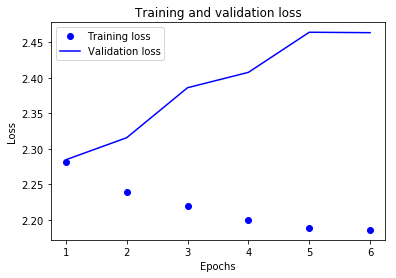

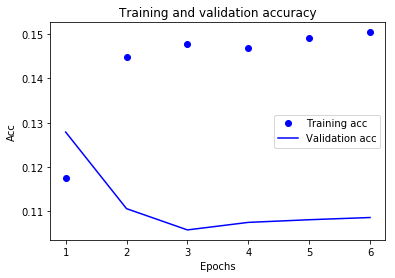

In [66]:
# initiate RMSprop optimizer
model=lenet5_drop()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=32,
    epochs=6,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()





**Discussion** 

Almost same architecture than the one used in the past test, with the addition of three dropout layers with a value of 0.5 (recommendated in Keras.io page). 

* Number of filters; 6, 1, 16 and 1. 
* The padding was only selecting for the last convolutional layer.
* The kernel size varied; 5, 2, 5, 2.
* Two Max pooling layers were implemented, with a stride of 2.
* Finally, 3 dense (fully connected) layers were used, with 400, 120 and 80, plus the final one fot the computing of the ten probabilities.

**Results**

* Loss: 2.1859
* Validation loss: 2.4634
* Accuracy: 0.1504
* Validation accuracy: 0.1086

As we can observe, the behavior of the model decreased considerably, since the accuracy fall to 0.1504, almost the half of the last obtained, joined with the fact that the validation accuracy decreased and the validation loss increased compared to the training ones, which indicates that the model is maybe overfitting, due to the dropout addition. 









# Test 3- LeNet with dropout and smaller kernels 

In [67]:
#Third model: incrementing filters, but with smaller kernels and smaller dropout values
def lenet5_CNN1():
    model=Sequential()
    model.add(layers.Conv2D(filters=15, kernel_size=(3,3), strides=1, padding='valid',activation='relu',input_shape=(32,32,3)))
    model.add(layers.Conv2D(filters=20, kernel_size=(2, 2), strides=2, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(Dropout(0.3))       
    model.add(layers.Conv2D(filters=25, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(layers.Conv2D(filters=30, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))          
    model.add(Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 24s 489us/step - loss: 2.1222 - accuracy: 0.1896 - val_loss: 1.9680 - val_accuracy: 0.2588
Epoch 2/6
50000/50000 [==============================] - 25s 508us/step - loss: 1.9126 - accuracy: 0.2691 - val_loss: 1.7642 - val_accuracy: 0.3309
Epoch 3/6
50000/50000 [==============================] - 25s 509us/step - loss: 1.7993 - accuracy: 0.3153 - val_loss: 1.7362 - val_accuracy: 0.3502
Epoch 4/6
50000/50000 [==============================] - 25s 509us/step - loss: 1.7316 - accuracy: 0.3467 - val_loss: 1.6382 - val_accuracy: 0.4012
Epoch 5/6
50000/50000 [==============================] - 26s 513us/step - loss: 1.6730 - accuracy: 0.3714 - val_loss: 1.5658 - val_accuracy: 0.4246
Epoch 6/6
10000/10000 [==============================] - 1s 109us/step
('Test loss:', 1.5029083377838135)
('Test accuracy:', 0.44339999556541443)


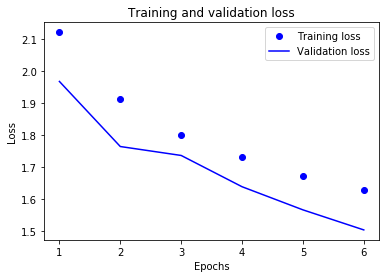

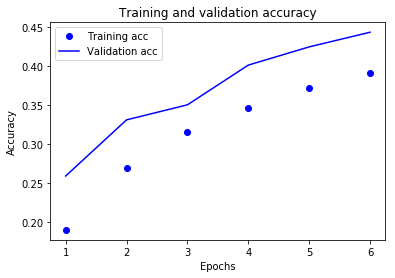

In [68]:
# initiate RMSprop optimizer
model=lenet5_CNN1()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=32,
    epochs=6,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 533us/step - loss: 2.1542 - accuracy: 0.1862 - val_loss: 1.9357 - val_accuracy: 0.2797
Epoch 2/10
50000/50000 [==============================] - 25s 507us/step - loss: 1.8936 - accuracy: 0.2905 - val_loss: 1.7782 - val_accuracy: 0.3463
Epoch 3/10
50000/50000 [==============================] - 26s 512us/step - loss: 1.7968 - accuracy: 0.3268 - val_loss: 1.7086 - val_accuracy: 0.3684
Epoch 4/10
50000/50000 [==============================] - 25s 510us/step - loss: 1.7413 - accuracy: 0.3525 - val_loss: 1.6433 - val_accuracy: 0.3887
Epoch 5/10
50000/50000 [==============================] - 26s 516us/step - loss: 1.6915 - accuracy: 0.3705 - val_loss: 1.6064 - val_accuracy: 0.3998
Epoch 6/10
50000/50000 [==============================] - 26s 511us/step - loss: 1.6492 - accuracy: 0.3880 - val_loss: 1.5421 - val_accuracy: 0.4283
Epoch 7/10
50000/50000 [==============================] 

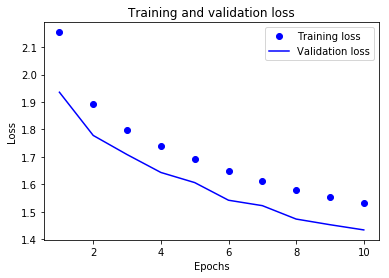

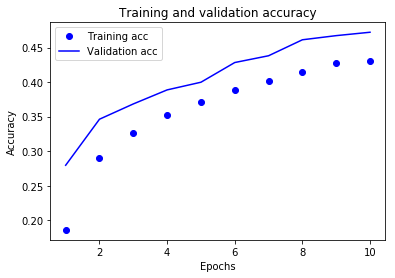

In [69]:
# Changing number of epochs to 10 
model=lenet5_CNN1()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Discussion**


For this time, a considerable increase was implemented regarding the number of filters, as well as a decrease in the dropout value and in the kernel size:
* Number of filters: 15, 20, 25, 30
* Kernel sizes: 3, 2, 3, 3
* Dropout value: 0.3
* Padding: active for the last three layers. 
* Dense layers (2): 512, 256 


On the first attempt, the model was run with an epoch number of 6, and then 10, in both cases a better performance was observed. 

**Results:**
*With 6 epochs:* 
* Loss: 1.6281
* Validation loss: 1.5029
* Accuracy: 0.3906
* Validation accuracy:0.4434

*With 10 epochs:* 
* Loss: 1.5325
* Validation loss: 1.4339
* Accuracy: 0.4308
* Validation accuracy: 0.4721

To begin with, it shows a great advance over the previous model. For instance, the validation accuracy increased from 0.1086 to 0.4721

As can be seen with the numbers, and indeed at first glance in the graphs, the two validation values are better than the training values, in the case of the loss, it is less, and in the accuracy, it is greater, so, the model is not overfitted.

Up to here, we can begin to conclude that the merely fact of increasing the number of filters, has a big impact on the better performance of the model, joined with the decreasing of the dropout value and kernel size. 

The accuracy value is still much less than the loss value, but as can be seen in this example, increasing the number of epochs, for the specific case of this model, contributes to increasing the accuracy value.








# Test 4- Increasing number of convolutional layers 

In [70]:
#Forth model: increasing convolutional layers
def lenet5_CNN2():
    model=Sequential()
    model.add(layers.Conv2D(filters=15, kernel_size=(3,3), strides=1, padding='valid',activation='relu',input_shape=(32,32,3)))
    model.add(layers.Conv2D(filters=20, kernel_size=(2, 2), strides=2, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(Dropout(0.3))       
    model.add(layers.Conv2D(filters=25, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=30, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(layers.Conv2D(filters=35, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(layers.Conv2D(filters=40, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 30s 597us/step - loss: 2.1224 - accuracy: 0.1668 - val_loss: 1.9320 - val_accuracy: 0.2199
Epoch 2/10
50000/50000 [==============================] - 31s 611us/step - loss: 1.9306 - accuracy: 0.2355 - val_loss: 1.8725 - val_accuracy: 0.2745
Epoch 3/10
50000/50000 [==============================] - 31s 613us/step - loss: 1.8312 - accuracy: 0.2969 - val_loss: 1.7192 - val_accuracy: 0.3543
Epoch 4/10
50000/50000 [==============================] - 31s 611us/step - loss: 1.7438 - accuracy: 0.3434 - val_loss: 1.7113 - val_accuracy: 0.3574
Epoch 5/10
50000/50000 [==============================] - 31s 614us/step - loss: 1.6838 - accuracy: 0.3697 - val_loss: 1.5977 - val_accuracy: 0.4001
Epoch 6/10
50000/50000 [==============================] - 31s 615us/step - loss: 1.6373 - accuracy: 0.3904 - val_loss: 1.5831 - val_accuracy: 0.4121
Epoch 7/10
50000/50000 [==============================] 

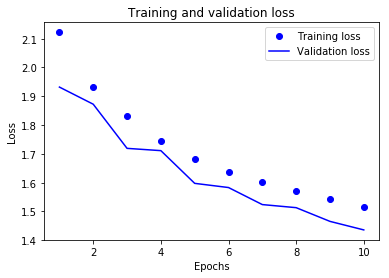

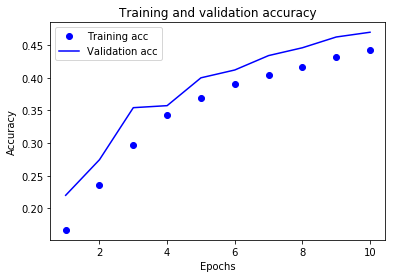

In [72]:
# initiate RMSprop optimizer
model=lenet5_CNN2()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



**Discussion**

For this time, a similar path from the test 3, was selected, only with the difference of the addition of layers. 


* Number of convolutional layers: 6
* Number of filters: 15, 20, 25, 30, 35, 40 
* Kernel size: 3, 2, 3, 3, 3, 3
* Padding: active for the last 5 layers
* Number of pooling layers: 3
* Dropout value ( 2 layers): 0.3
* Dense layers: 2 (512, 256 units) and the last (10 units) "softmax"
* Number of epochs: 20


Results

* Loss: 1.5156
* Validation loss: 1.4360
* Accuracy: 0.4425
* Validation accuracy: 0.4700


There is not much difference compared to the previous model and the validation values are still better than the training ones. If any, the improvement could be seen in the trainign values, where the accuracy value increased compared to that of the past test (from 0.4308 to 0.4425), obviously resulting in a decrease in the loss value.

This could be indicating that what actually works is the addition of filters rather than the number of layers. And to prove that, the next test was carried out.








# Test 5- Same layers that the model of Test 3, but more filters 


In [73]:
def lenet5_CNN3():
    model=Sequential()
    model.add(layers.Conv2D(filters=30, kernel_size=(3,3), strides=1, padding='valid',activation='relu',input_shape=(32,32,3)))
    model.add(layers.Conv2D(filters=35, kernel_size=(3,3), strides=2, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(Dropout(0.3))       
    model.add(layers.Conv2D(filters=40, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))
    model.add(layers.Conv2D(filters=45, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(strides=2))          
    model.add(Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s 780us/step - loss: 2.0605 - accuracy: 0.2185 - val_loss: 1.8545 - val_accuracy: 0.3030
Epoch 2/10
50000/50000 [==============================] - 39s 790us/step - loss: 1.7860 - accuracy: 0.3274 - val_loss: 1.6839 - val_accuracy: 0.3821
Epoch 3/10
50000/50000 [==============================] - 40s 796us/step - loss: 1.6539 - accuracy: 0.3833 - val_loss: 1.5237 - val_accuracy: 0.4384
Epoch 4/10
50000/50000 [==============================] - 40s 799us/step - loss: 1.5690 - accuracy: 0.4184 - val_loss: 1.5015 - val_accuracy: 0.4421
Epoch 5/10
50000/50000 [==============================] - 40s 801us/step - loss: 1.5138 - accuracy: 0.4407 - val_loss: 1.4033 - val_accuracy: 0.4806
Epoch 6/10
50000/50000 [==============================] - 40s 795us/step - loss: 1.4660 - accuracy: 0.4591 - val_loss: 1.3752 - val_accuracy: 0.4969
Epoch 7/10
50000/50000 [==============================] 

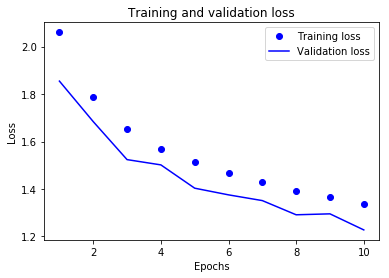

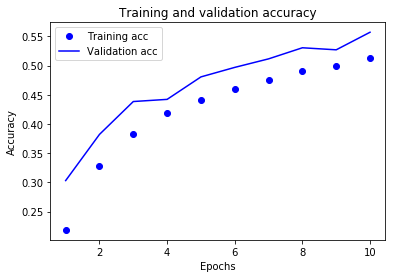

In [74]:
# initiate RMSprop optimizer
model=lenet5_CNN3()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 41s 822us/step - loss: 2.0450 - accuracy: 0.2214 - val_loss: 1.8142 - val_accuracy: 0.3170
Epoch 2/15
50000/50000 [==============================] - 41s 811us/step - loss: 1.7800 - accuracy: 0.3255 - val_loss: 1.7026 - val_accuracy: 0.3730
Epoch 3/15
50000/50000 [==============================] - 41s 814us/step - loss: 1.6780 - accuracy: 0.3733 - val_loss: 1.5553 - val_accuracy: 0.4278
Epoch 4/15
50000/50000 [==============================] - 40s 810us/step - loss: 1.5940 - accuracy: 0.4086 - val_loss: 1.5079 - val_accuracy: 0.4445
Epoch 5/15
50000/50000 [==============================] - 40s 808us/step - loss: 1.5355 - accuracy: 0.4326 - val_loss: 1.4521 - val_accuracy: 0.4682
Epoch 6/15
50000/50000 [==============================] - 41s 813us/step - loss: 1.4848 - accuracy: 0.4539 - val_loss: 1.3809 - val_accuracy: 0.4893
Epoch 7/15
50000/50000 [==============================] 

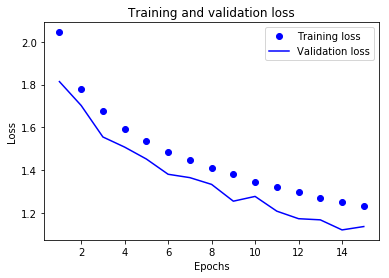

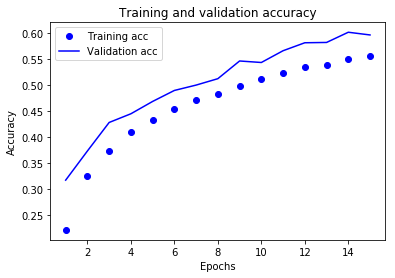

In [75]:
# initiate RMSprop optimizer
model=lenet5_CNN3()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Train with a different optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(x_test, y_test),
    shuffle=True)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




**Discussions**

Same number of convolutional layers (4) than in test 3. 

* Number of filters: 15, 20, 25, 30
* Kernel sizes: 3, 2, 3, 3
* Dropout value: 0.3
* Padding: active for the last three layers. 
* Dense layers (2): 512, 256 plus the last softmax


Again, the model was run two times, first with 10 epochs, and then with 15. 

Results: 

*With 10 epochs:*
* Loss: 1.3366
* Validation loss: 1.2275
* Accuracy: 0.5122
* Validation accuracy: 0.5571


*With 15 epochs:*
* Loss: 1.2305
* Validation loss: 1.1364
* Accuracy: 0.5556
* Validation accuracy: 0.5959


This is the model with the best performance. There is no overfitting since the validation values are better than the training ones. The accuracy increases considerably compared with the las models, and if the number of eppochs were augmented, it could improve even more. 








# Conclusions 

There are many ways and combinations of values in which a convolutional network architecture could be made, however, according to the results of the last 5 tests, it could be concluded that:

* The number of filters (a big one) helps to improve the model performance more than the augmentation of the number of layers. 
* The dropout value should be preferably small, to avoid overfitting. 
* Adding epochs could improve the accuracy value, mostly because, as in this case, the learning rate was to small. 
* The increase on the hidden units of the dense layers also beneffit the model performance, even when a layer was removed. 









